<a href="https://colab.research.google.com/github/Kggzzz/AIPrototype2022_1/blob/main/Tensorflow(network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential ง่าย แต่สร้างได้แต่แบบไม่ซับซ้อน (วิ่งเป็นเส้นตรง)
2. Funtional  ยากขึ้นมาอีกนิด แต่สามารถปรับเส้นทาง,network ให้มีความซับซ้อนได้มากขึ้น

 ~3. Subclassing~ (ยากสุด แต่สามารถแก้ไขได้ตามที่เราต้องการ)


#The Sequential model


##import

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

##Defind
นิยามให้ตัว modle หน้าตาเป็นยังไง คือ k เป็นเท่าไหร่ โหวตยังไง วัดระยะอย่างไร

In [62]:
# Define Sequential model with 3 layers 
# ตัวนี้กำหนดให้เป็น keras แบบ Sequential 
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"), #กำหนดว่า layer คืออะไรบ้าง Dense คือ node ที่เราจะนำไปเชื่อมกับตัว input
        layers.Dense(3, activation="relu", name="layer2"), 
        layers.Dense(4, name="layer3"),
    ]
)

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


##train (รวมกับการนำเข้าข้อมูลใน colab notebook หน้า)

#Predict

In [64]:
# Call layer on a test input
x = tf.ones((5, 4))
y = model(x)

In [65]:
x

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [66]:
y

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

สร้าง sequential แบบที่สอง

In [67]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(4))

In [68]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 2)                 10        
                                                                 
 dense_15 (Dense)            (None, 3)                 9         
                                                                 
 dense_16 (Dense)            (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


ปรับเปลี่ยน Network 

In [69]:
model2.pop()

In [70]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 2)                 10        
                                                                 
 dense_15 (Dense)            (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [71]:
model2.add(layers.Dense(6))

In [72]:
#ให้ data ไหลผ่าน
x = tf.ones((5, 4))
y = model2(x)

In [73]:
y #อันนี้คือ node สุดท้ายที่จะได้ออกมา 

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[ 0.7123276 , -0.35691217, -0.7302544 , -0.04274062,  0.2557212 ,
        -0.05203485],
       [ 0.7123276 , -0.35691217, -0.7302544 , -0.04274062,  0.2557212 ,
        -0.05203485],
       [ 0.7123276 , -0.35691217, -0.7302544 , -0.04274062,  0.2557212 ,
        -0.05203485],
       [ 0.7123276 , -0.35691217, -0.7302544 , -0.04274062,  0.2557212 ,
        -0.05203485],
       [ 0.7123276 , -0.35691217, -0.7302544 , -0.04274062,  0.2557212 ,
        -0.05203485]], dtype=float32)>

ลองเทรน Sequentail model ที่สร้างเอง 

Convolutional Neural Network (CNN)

import

In [74]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [75]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [76]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0 #ปรับค่าให้สามารถเข้าไปใช้ใน neural network เฉยๆ 

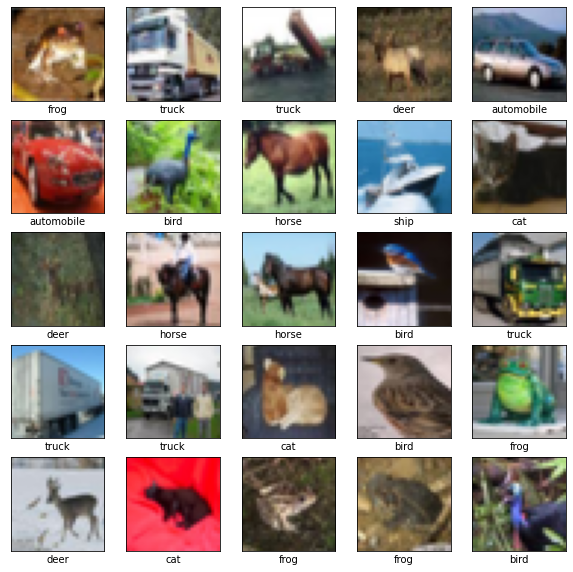

In [77]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

##Defind (Create the convolutional base)

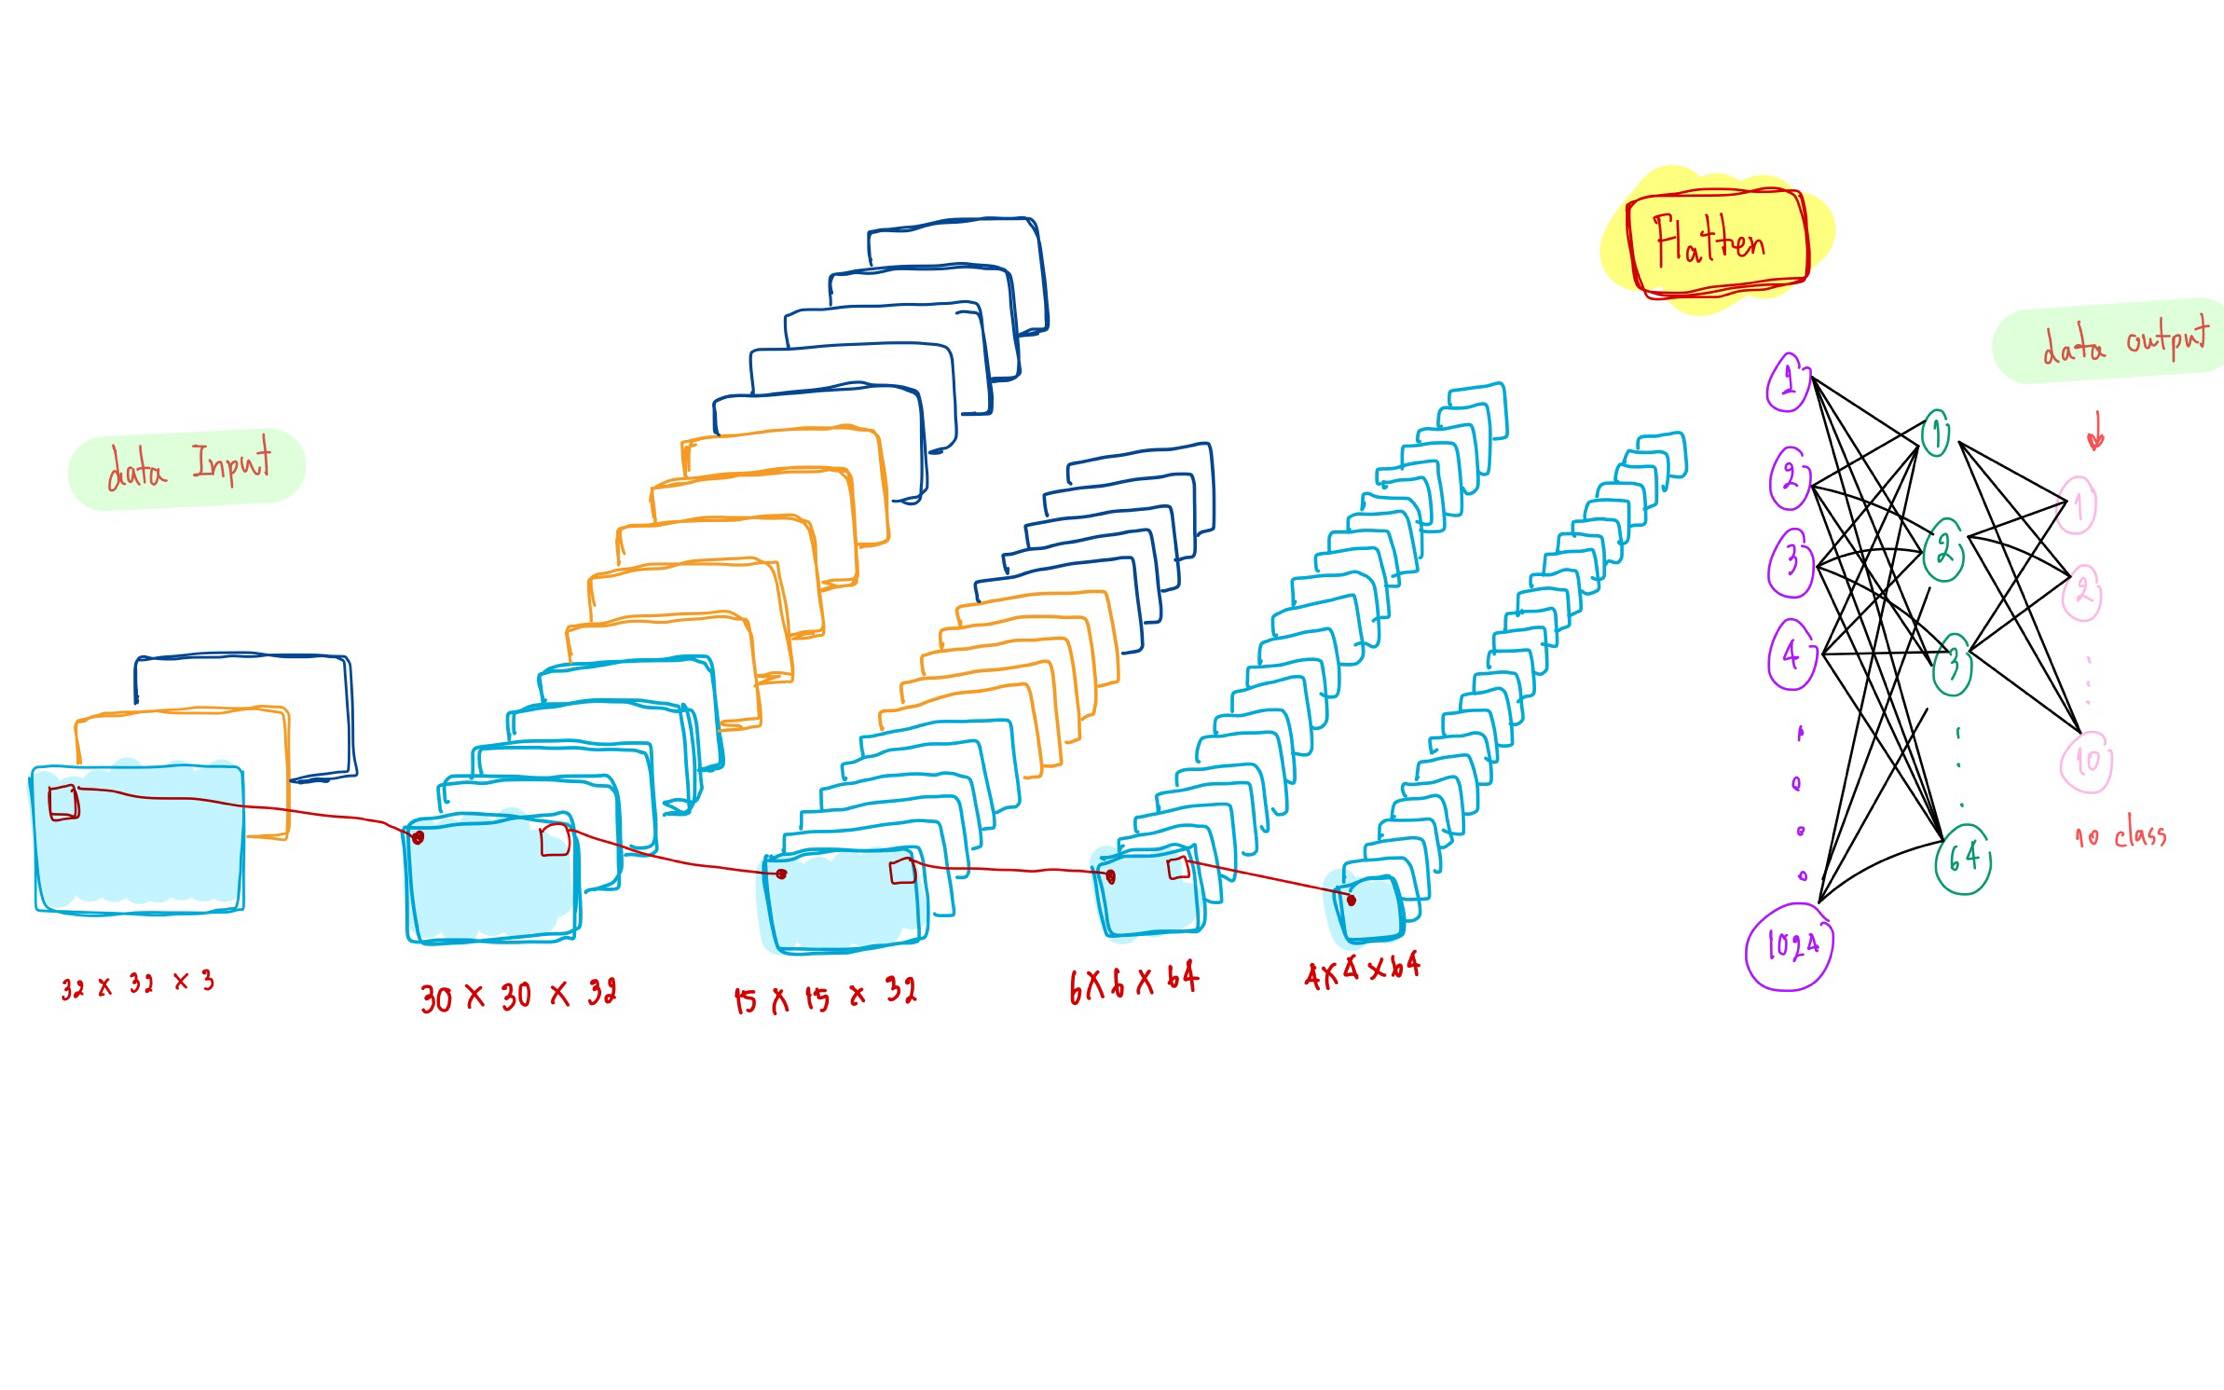

In [78]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #กว้าง 32 ยาว 32 มีเคเนล 3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [79]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

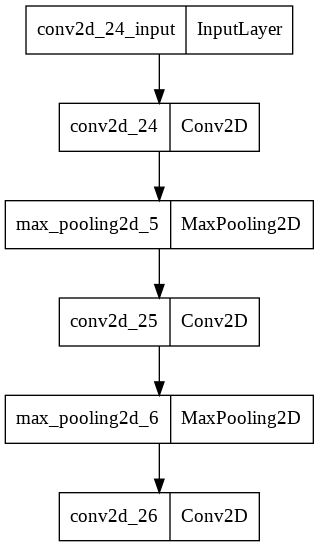

In [80]:
keras.utils.plot_model(model) 

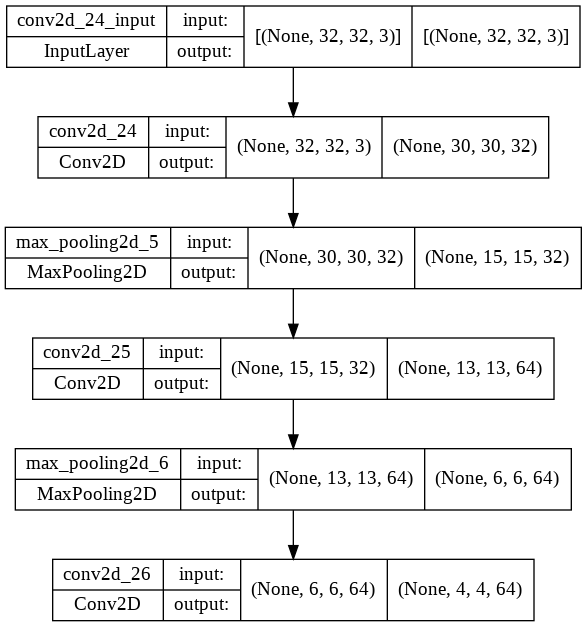

In [81]:
keras.utils.plot_model(model,show_shapes=True) 

ต่อด้วย flatten และ dense เพิ่้อทำนาย

In [82]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [83]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

train

In [84]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [85]:
history = model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 13s 8ms/step - loss: 1.5008 - accuracy: 0.4518 - val_loss: 1.3622 - val_accuracy: 0.5224
Epoch 2/2
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1407 - accuracy: 0.5952 - val_loss: 1.0820 - val_accuracy: 0.6102


test

313/313 - 1s - loss: 1.0820 - accuracy: 0.6102 - 1s/epoch - 3ms/step


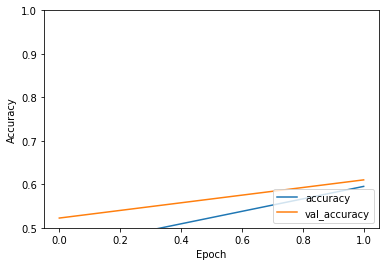

In [86]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [87]:
print(test_acc)

0.6101999878883362


#Funtional

In [88]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [89]:
#ตัวอย่าง
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #กว้าง 32 ยาว 32 มีเคเนล 3
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

In [90]:
input_image = keras.Input(shape=(32,32,3), name="img")
model = layers.Conv2D(32,(3,3),activation='relu', name="conv1")(input_image)
model = layers.MaxPooling2D((2,2), name="maxp1")(model)
model = layers.Conv2D(64,(3,3),activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2,2), name="maxp2")(model)
model = layers.Conv2D(64,(3,3),activation='relu', name="conv3")(model)
model = layers.Flatten()(model)
model = layers.Dense(64,activation='relu')(model)
output = layers.Dense(10)(model)

In [91]:
my_model = keras.Model(input_image, output, name="mymodel")

In [92]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxp1 (MaxPooling2D)        (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxp2 (MaxPooling2D)        (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0   

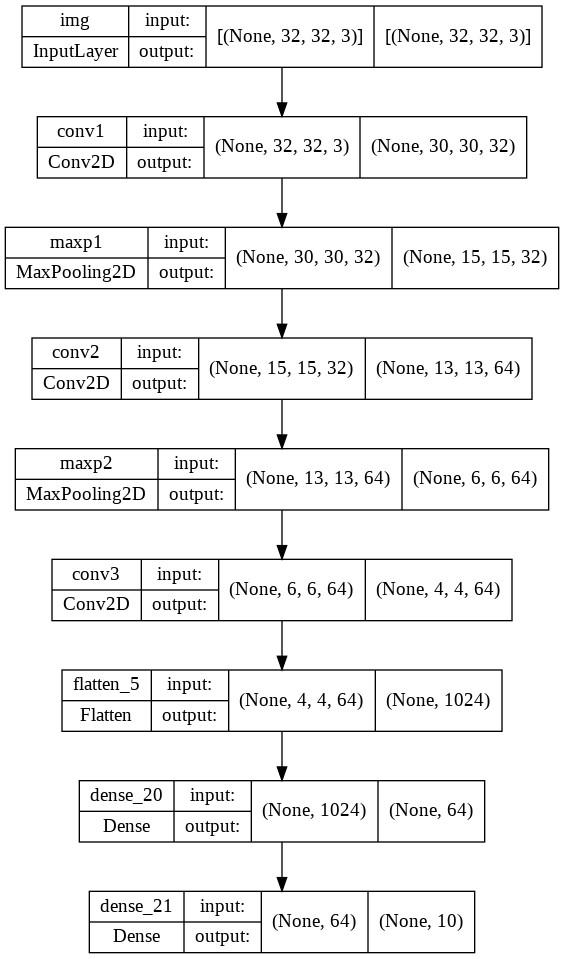

In [93]:
keras.utils.plot_model(my_model, "multi_input_and_output_model.png", show_shapes=True)

In [94]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [95]:
history = my_model.fit(train_images, train_labels, epochs=2, 
                    validation_data=(test_images, test_labels))

Epoch 1/2
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5385 - accuracy: 0.4381 - val_loss: 1.2753 - val_accuracy: 0.5372
Epoch 2/2
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1656 - accuracy: 0.5877 - val_loss: 1.1319 - val_accuracy: 0.6016


313/313 - 1s - loss: 1.1319 - accuracy: 0.6016 - 1s/epoch - 3ms/step


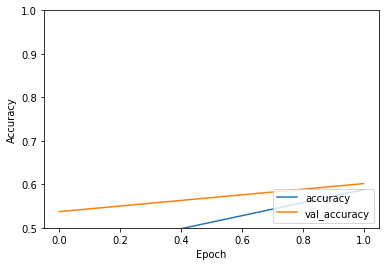

In [96]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [97]:
print(test_acc)

0.6015999913215637


#ResNet

In [98]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [99]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_27 (Conv2D)             (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_28 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_27[0][0]']              
                                                                                                  
 max_pooling2d_7 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_28[0][0]']              
                                                                                         

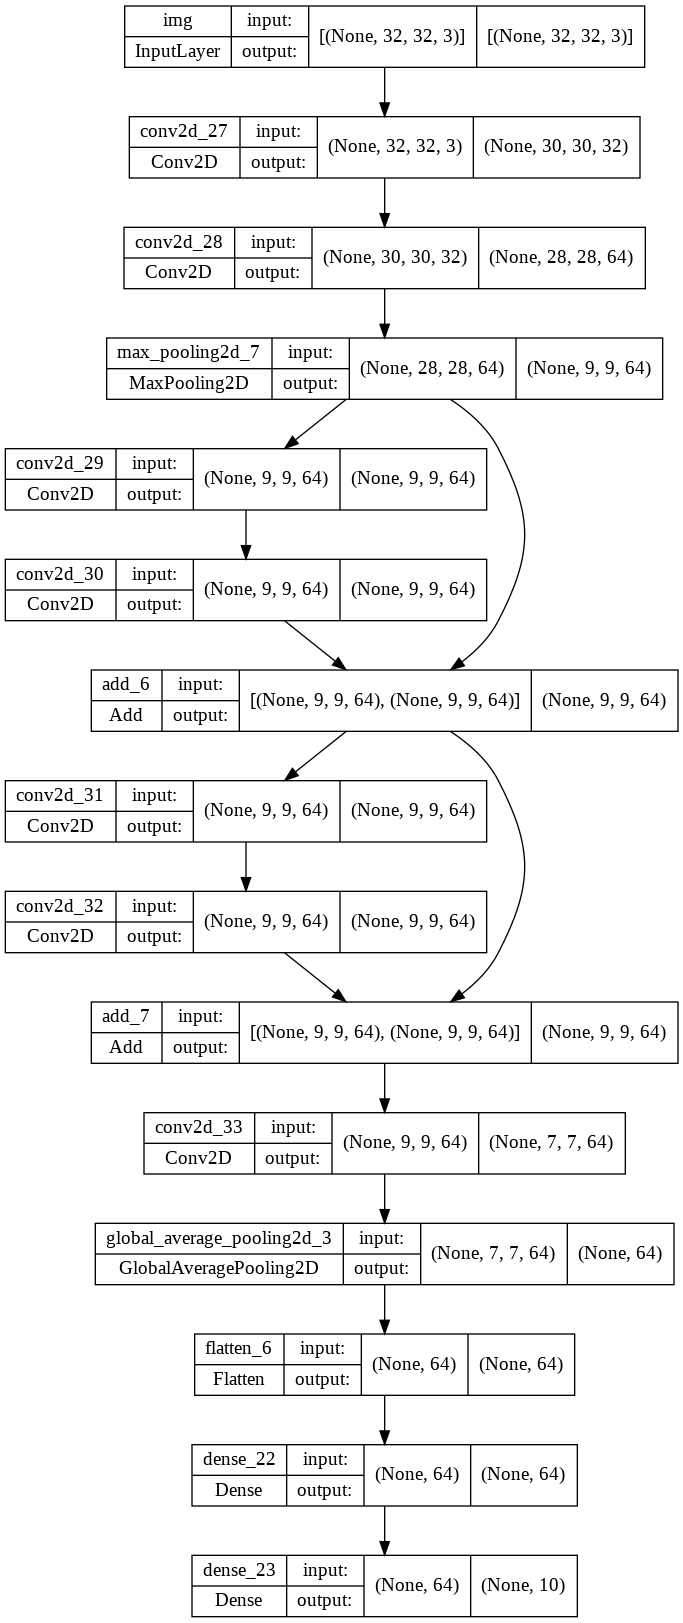

In [100]:
keras.utils.plot_model(resnet_model,show_shapes=True)

In [101]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [102]:
history2 = resnet_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 23s 14ms/step - loss: 1.6418 - accuracy: 0.3735 - val_loss: 1.3077 - val_accuracy: 0.5167
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.1268 - accuracy: 0.5896 - val_loss: 0.9991 - val_accuracy: 0.6427
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9035 - accuracy: 0.6770 - val_loss: 0.8821 - val_accuracy: 0.6869
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7831 - accuracy: 0.7215 - val_loss: 0.8559 - val_accuracy: 0.7048
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.6953 - accuracy: 0.7519 - val_loss: 0.7174 - val_accuracy: 0.7553
Epoch 6/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.6264 - accuracy: 0.7802 - val_loss: 0.7019 - val_accuracy: 0.7592
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5669 - accuracy: 0.8022 - val_loss: 0.7287 -

313/313 - 2s - loss: 0.6592 - accuracy: 0.7816 - 2s/epoch - 6ms/step


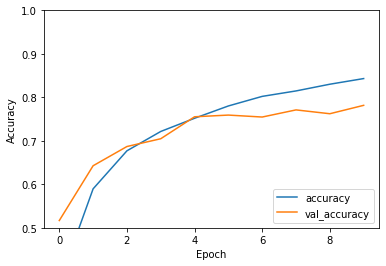

In [103]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = resnet_model.evaluate(test_images,  test_labels, verbose=2)

In [104]:
print(test_acc)

0.7815999984741211


#HW Modify my_model ให้มี skip connections แล้ว train test เทียบ my_model กับ resnet_moodel

In [105]:
my_input = keras.Input(shape=(32, 32, 3), name="img_2")
x = layers.Conv2D(32, 3, activation="relu")(my_input)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1 = layers.MaxPooling2D(2,2)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2= layers.add([x, block_1])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3 = layers.add([x, block_2])

x = layers.Conv2D(64, 3, activation="relu")(block_3)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)

my_output = layers.Dense(10)(x)

my_model = keras.Model(my_input, my_output, name="my_model")
my_model.summary()

Model: "my_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_2 (InputLayer)             [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_34 (Conv2D)             (None, 30, 30, 32)   896         ['img_2[0][0]']                  
                                                                                                  
 conv2d_35 (Conv2D)             (None, 28, 28, 64)   18496       ['conv2d_34[0][0]']              
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 14, 14, 64)  0           ['conv2d_35[0][0]']              
                                                                                           

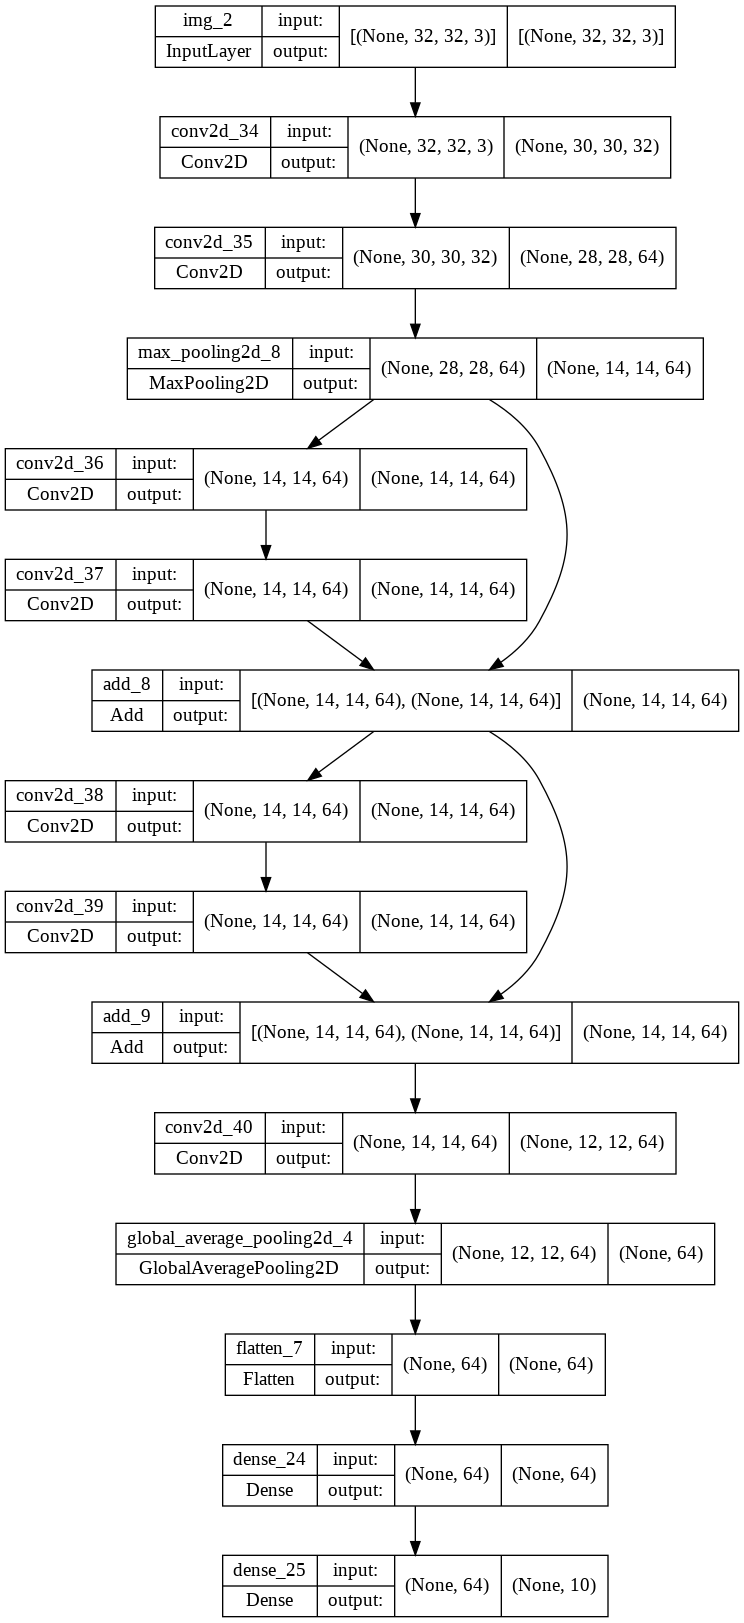

In [106]:
keras.utils.plot_model(my_model,show_shapes=True)

In [107]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [108]:
History = my_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.6823 - accuracy: 0.3513 - val_loss: 1.4363 - val_accuracy: 0.4695
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.2119 - accuracy: 0.5536 - val_loss: 1.1508 - val_accuracy: 0.5906
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9992 - accuracy: 0.6388 - val_loss: 0.9210 - val_accuracy: 0.6711
Epoch 4/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8689 - accuracy: 0.6894 - val_loss: 0.8460 - val_accuracy: 0.7031
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7738 - accuracy: 0.7248 - val_loss: 0.8387 - val_accuracy: 0.7064
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7060 - accuracy: 0.7526 - val_loss: 0.7809 - val_accuracy: 0.7225
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6472 - accuracy: 0.7734 - val_loss: 0.7612 -

In [109]:
import numpy as np

313/313 - 2s - loss: 0.7506 - accuracy: 0.7557 - 2s/epoch - 7ms/step


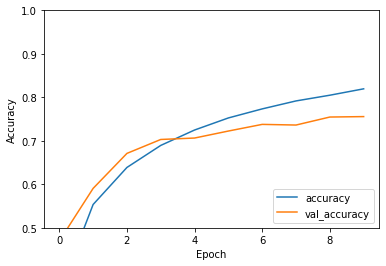

In [110]:
plt.plot(History.history['accuracy'], label='accuracy')
plt.plot(History.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss2, test_acc2 = my_model.evaluate(test_images, test_labels, verbose=2)

In [111]:
print(test_acc2)

0.7556999921798706


#การโหลดข้อมูล

Link: https://www.tensorflow.org/guide/data

tf.data: Build TensorFlow input pipelines : ฟังค์ชันช่วยในการโหลดที่เร็วขึ้นและช่วย augmentation

- flow from directory (data path) : เก็บข้อมูลไว้ใน folder เวลาใช้ก็เรียใช้ข้อมูลใน folder path นั้น
- รายการในลิสต์

" batch size : ส่มข้อมูลแบบไม่ใช่คืนในแต่ละ epoch"

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
path2 =  '/content/drive/MyDrive/Classification Dataset'

In [114]:
inputs = keras.Input(shape=(80, 80, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_dog_muff = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_dog_muff.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d_41 (Conv2D)             (None, 78, 78, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_42 (Conv2D)             (None, 76, 76, 64)   18496       ['conv2d_41[0][0]']              
                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, 25, 25, 64)  0           ['conv2d_42[0][0]']              
                                                                                    

In [115]:
# inputs = keras.Input(shape=(80, 80, 3), name="img")
# x = layers.Conv2D(32, 3, activation="relu")(inputs)
# x = layers.Conv2D(64, 3, activation="relu")(x)
# block_1_output = layers.MaxPooling2D(3)(x)

# x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
# x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
# block_2_output = layers.add([x, block_1_output])

# x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
# x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
# block_3_output = layers.add([x, block_2_output, block_1_output])

# x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
# x = layers.GlobalAveragePooling2D()(x)
# x = layers.Dense(256, activation="relu")(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(2)(x)

# resnet_dog_muff = keras.Model(inputs, outputs, name="resnet_dog_muff")
# resnet_dog_muff.summary()

In [116]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        directory = path2,
        target_size = (80, 80),
        batch_size=4,
        color_mode= 'rgb',
        class_mode='categorical')

# test_generator = test_datagen.flow_from_dataframe(
#         dataframe = valframe,
#         directory = validation_dir,
#         x_col = 'filename',
#         y_col = 'Sub_class',
#         target_size = (height, width),
#         batch_size=batch_size,
#         color_mode= 'rgb',
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [117]:
from tensorflow.keras import optimizers

In [118]:
resnet_dog_muff.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-10),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [119]:
# ปรับแก้ ให้ loss มันลดลงมากกว่านี้
history = resnet_dog_muff.fit_generator(
    train_generator,
    steps_per_epoch= 7,
    epochs=100,
    verbose =1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


7/7 [==============================] - 2s 57ms/step - loss: 4.2566 - accuracy: 0.4615
Epoch 2/100
7/7 [==============================] - 0s 63ms/step - loss: 5.5616 - accuracy: 0.5714
Epoch 3/100
7/7 [==============================] - 0s 45ms/step - loss: 3.6413 - accuracy: 0.5385
Epoch 4/100
7/7 [==============================] - 0s 63ms/step - loss: 5.2694 - accuracy: 0.4286
Epoch 5/100
7/7 [==============================] - 0s 38ms/step - loss: 3.2581 - accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 0s 43ms/step - loss: 6.5691 - accuracy: 0.5000
Epoch 7/100
7/7 [==============================] - 0s 64ms/step - loss: 4.1956 - accuracy: 0.3462
Epoch 8/100
7/7 [==============================] - 0s 59ms/step - loss: 5.9423 - accuracy: 0.5769
Epoch 9/100
7/7 [==============================] - 0s 54ms/step - loss: 2.8880 - accuracy: 0.8462
Epoch 10/100
7/7 [==============================] - 0s 60ms/step - loss: 4.1995 - accuracy: 0.5000
Epoch 11/100
7/7 [=============

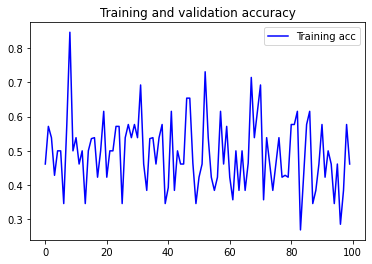

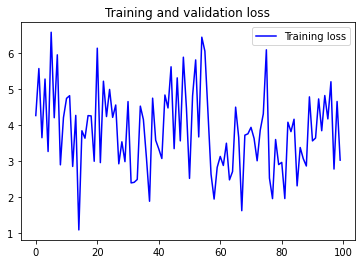

In [120]:
acc = history.history['accuracy']
# val_acc = history.history['val_acc']
loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_x = range(len(acc))

plt.plot(epochs_x, acc, 'b', label='Training acc')
# plt.plot(epochs_x, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_x, loss, 'b', label='Training loss')
# plt.plot(epochs_x, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()